<a href="https://colab.research.google.com/github/diego51alejo/Crime_Prediction/blob/master/Predicciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación y predicción de los delitos**

Se realiza una clasificación de los tipos de delitos y una predicción en diferentes ventanas de tiempo con series de tiempo a partir de AutoArima.

## Carga de la data

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/Colab Notebooks/db'

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/db


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('crime_bucaramanga_act.csv')

In [4]:
df1 = df[df['CONDUCTA'] == 'HURTO A PERSONAS']

In [5]:
df1

,CONDUCTA,LATITUD,LONGITUD,NOM_COMUNA,BARRIOS_HECHO,ANO,MES,DIA,DIA_SEMANA,GENERO,EDAD,MOVIL_VICTIMA,MOVIL_AGRESOR,CONDUCTA_SIMP
0,HURTO A PERSONAS,7.125632,-73.107730,ORIENTAL,LAS AMERICAS,2014,ENERO,1,MIÉRCOLES,MASCULINO,28,A PIE,A PIE,HURTO
3,HURTO A PERSONAS,7.094324,-73.104601,LAGOS DEL CACIQUE,BALCON DEL TEJAR,2014,ENERO,1,MIÉRCOLES,MASCULINO,27,A PIE,A PIE,HURTO
5,HURTO A PERSONAS,7.178242,-73.132504,NORTE,COLORADOS,2014,ENERO,1,MIÉRCOLES,MASCULINO,31,A PIE,A PIE,HURTO
6,HURTO A PERSONAS,7.103706,-73.123374,LA CIUDADELA,CIUDADELA REAL DE MINAS,2014,ENERO,2,JUEVES,MASCULINO,47,A PIE,A PIE,HURTO
7,HURTO A PERSONAS,7.121896,-73.114334,ORIENTAL,MEJORAS PUBLICAS,2014,ENERO,2,JUEVES,FEMENINO,21,A PIE,A PIE,HURTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67502,HURTO A PERSONAS,7.118838,-73.123032,CENTRO,CENTRO,2020,DICIEMBRE,31,JUEVES,MASCULINO,26,A PIE,A PIE,HURTO
67503,HURTO A PERSONAS,7.101214,-73.104663,LAGOS DEL CACIQUE,EL TEJAR,2020,DICIEMBRE,31,JUEVES,MASCULINO,49,A PIE,CONDUCTOR MOTOCICLETA,HURTO
67504,HURTO A PERSONAS,7.105120,-73.097117,CABECERA DEL LLANO,PAN DE AZUCAR,2020,DICIEMBRE,31,JUEVES,FEMENINO,40,A PIE,A PIE,HURTO
67505,HURTO A PERSONAS,7.144403,-73.103213,MORRORICO,LA MALAÑA (URBANO),2020,DICIEMBRE,31,JUEVES,MASCULINO,46,CONDUCTOR MOTOCICLETA,A PIE,HURTO


In [6]:
dir_pandas = '/content/drive/My Drive/Colab Notebooks/db/{}'.format('datos_abiertos.csv')
df1.to_csv(dir_pandas, sep=',', index=False)

## Procesamiento de los datos

In [7]:
m = {
        'ENERO': "01",
        'FEBRERO': "02",
        'MARZO': "03",
        'ABRIL': "04",
        'MAYO': "05",
        'JUNIO': "06",
        'JULIO': "07",
        'AGOSTO': "08",
        'SEPTIEMBRE': "09",
        'OCTUBRE': "10",
        'NOVIEMBRE': "11",
        'DICIEMBRE': "12"
        }

In [8]:
def check_mes(mes_int):
  for mes in m.keys():
    if mes == mes_int:
      return m[mes]
df['MES_NUM'] = df['MES'].apply(lambda x: check_mes(x))

In [9]:
df['FECHA'] = df['DIA'].astype(str) + '-' + df['MES_NUM'] + '-' + df['ANO'].astype(str)
df['FECHA'] = pd.to_datetime(df['FECHA'], format="%d-%m-%Y")

In [10]:
df = df.fillna(0)

In [11]:
df = df[df['ANO']<2020]

In [12]:
variables_numericas = df.filter(['LATITUD', 'LONGITUD', 'ANO'])
variables_categoricas = df.filter(['NOM_COMUNA','MES','DIA_SEMANA','GENERO', 'MOVIL_AGRESOR', 'MOVIL_VICTIMA'])

In [13]:
df_categoricas = pd.get_dummies(variables_categoricas, drop_first=True)

In [14]:
X = pd.concat([variables_numericas, df_categoricas], axis=1)
X

,LATITUD,LONGITUD,ANO,NOM_COMUNA_CENTRO,NOM_COMUNA_EGIMIENTO 1,NOM_COMUNA_EGIMIENTO 2,NOM_COMUNA_EGIMIENTO 3,NOM_COMUNA_GARCÍA ROVIRA,NOM_COMUNA_LA CIUDADELA,NOM_COMUNA_LA CONCORDIA,...,MOVIL_VICTIMA_CONDUCTOR TAXI,MOVIL_VICTIMA_CONDUCTOR VEHICULO,MOVIL_VICTIMA_NO REPORTA,MOVIL_VICTIMA_PASAJERO AERONAVE,MOVIL_VICTIMA_PASAJERO BARCO,MOVIL_VICTIMA_PASAJERO BUS,MOVIL_VICTIMA_PASAJERO METRO,MOVIL_VICTIMA_PASAJERO MOTOCICLETA,MOVIL_VICTIMA_PASAJERO TAXI,MOVIL_VICTIMA_PASAJERO VEHICULO
0,7.125632,-73.107730,2014,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.122018,-73.122284,2014,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.091039,-73.132343,2014,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.094324,-73.104601,2014,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.111094,-73.140048,2014,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63303,7.090710,-73.130972,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63304,7.133665,-73.136067,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63305,7.098490,-73.110478,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63306,7.132249,-73.119572,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y = df['CONDUCTA']
y

0                     HURTO A PERSONAS
1        HURTO A ENTIDADES COMERCIALES
2        HURTO A ENTIDADES COMERCIALES
3                     HURTO A PERSONAS
4                 HURTO A MOTOCICLETAS
                     ...              
63303              LESIONES PERSONALES
63304              LESIONES PERSONALES
63305              LESIONES PERSONALES
63306              LESIONES PERSONALES
63307              LESIONES PERSONALES
Name: CONDUCTA, Length: 49117, dtype: object

In [48]:
y.unique()

array(['HURTO A PERSONAS', 'HURTO A ENTIDADES COMERCIALES',
       'HURTO A MOTOCICLETAS', 'HURTO A RESIDENCIAS',
       'HURTO A AUTOMOTORES', 'HURTO A ABIGEATO',
       'HURTO A ENTIDADES FINANCIERAS', 'HURTO A PIRATERÍA TERRESTRE',
       'HOMICIDIO', 'FEMINICIDIO', 'LESIONES PERSONALES'], dtype=object)

## Clasificación de los delitos

In [16]:
from sklearn.metrics import *
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.25)

In [28]:
predictor = RandomForestClassifier(criterion='gini', n_estimators=200).fit(X_train,y_train)

In [29]:
prediccion = predictor.predict(X_test)

In [30]:
accuracy_score(y_test, prediccion)

0.7063517915309446

In [34]:
recall_score(y_test, prediccion, average='micro')

0.7063517915309446

In [32]:
precision_score(y_test, prediccion, average='micro')

0.7063517915309446

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictor.predict(X_test))

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(10,10)

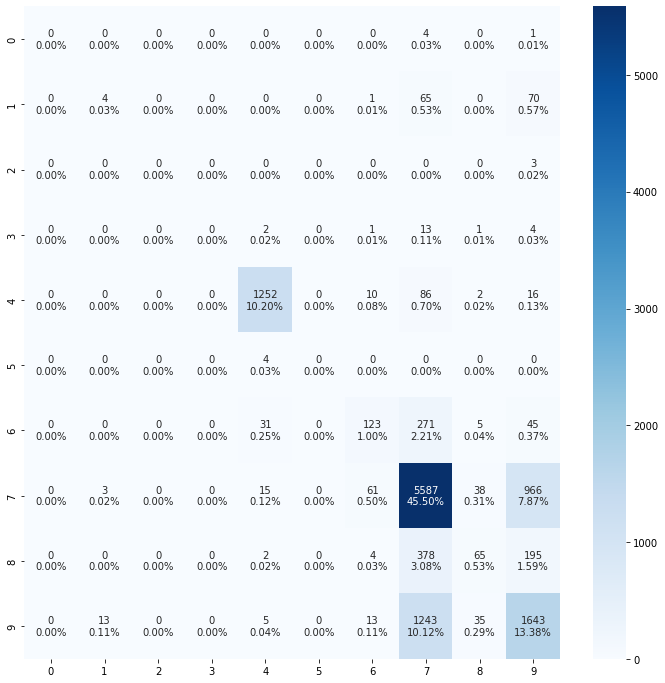

In [47]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=labels,fmt='', cmap='Blues')

In [51]:
confusion_matrix(y_test, predictor.predict(X_test), labels=['HURTO A PERSONAS', 'LESIONES PERSONALES'])

array([[5587,  966],
       [1243, 1643]])

Se evidencia que el modelo tiene dificultad para predecir la etiqueta nueva y la siete, los cuales representan hurtos a personas y lesiones personales.

In [36]:
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Quita las warnings
import warnings
warnings.simplefilter("ignore")

In [37]:
estimadores = {
    'Decision Tree': tree.DecisionTreeClassifier(criterion='entropy'),
    'SVM': svm.SVC(),
    'SGD': SGDClassifier(loss='log', penalty='l2', max_iter=8),
    'KNN': KNeighborsClassifier(n_neighbors=11),
    'Logistic Regression': LogisticRegression(),
    'Gradiend Boosting':GradientBoostingClassifier(n_estimators=200)
}

In [38]:
for name, estimador in estimadores.items():
    estimador.fit(X_train,y_train)
    predictions = estimador.predict(X_test)
    print('*'*20)
    print(name)
    print('Accuracy Score ', accuracy_score(y_test, predictions) )

********************
Decision Tree
Accuracy Score  0.6263843648208469
********************
SVM
Accuracy Score  0.5431596091205212
********************
SGD
Accuracy Score  0.5431596091205212
********************
KNN
Accuracy Score  0.6456026058631922
********************
Logistic Regression
Accuracy Score  0.5431596091205212
********************
Gradiend Boosting
Accuracy Score  0.6973127035830619


In [ ]:
concordia = pd.concat([X,y], axis=1)
concordia = concordia[(concordia['NOM_COMUNA_LA CONCORDIA'] == 1) & (concordia['ANO'] < 2020)]

In [ ]:
concordia_y = concordia.iloc[:,[-1]]
concordia_x = concordia.iloc[:,:-1]
X_train, X_test,y_train, y_test = train_test_split(concordia_x,concordia_y, test_size=0.35)
predictor = RandomForestClassifier(criterion='entropy', n_estimators=300).fit(X_train,y_train)
cross_val_score(predictor, X_train, y_train, cv=2)

## Series de Tiempo

In [ ]:
df['ones'] = 1

In [ ]:
df_time = df.groupby(['FECHA'])['ones'].sum()

In [ ]:
import matplotlib.pyplot as plt

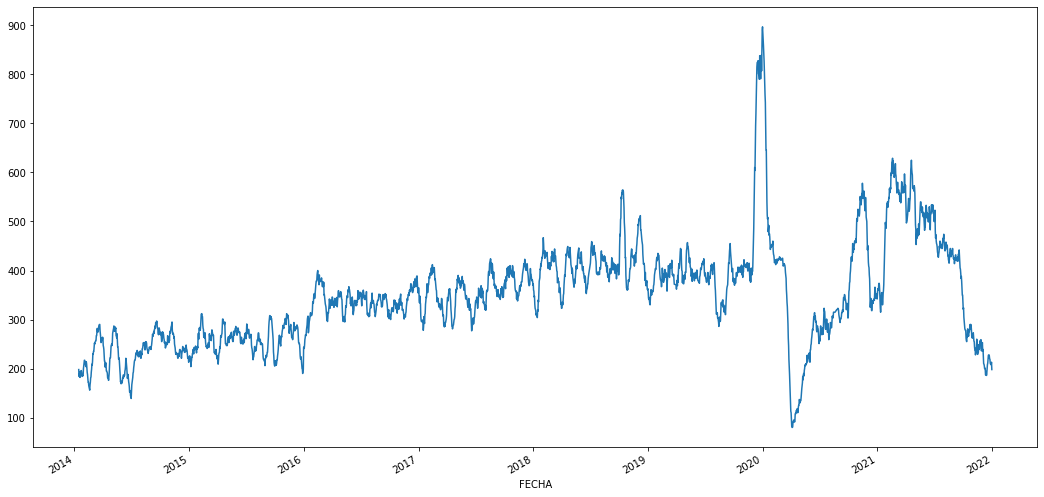

In [ ]:
plt.figure(figsize=(18,9))
df_time.rolling(window=15).sum().plot()

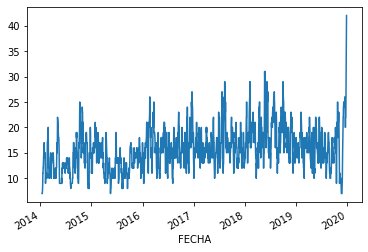

In [ ]:
df_concordia = df[df['NOM_COMUNA'] == 'LA CONCORDIA']
df_time_concordia = df_concordia.groupby(['FECHA'])['ones'].sum()
df_time_concordia.rolling(window=7).sum().plot()

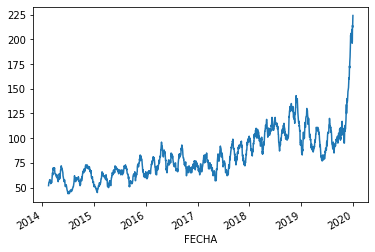

In [ ]:
df_time_oriental = df[df['NOM_COMUNA'] == 'ORIENTAL']
df_time_oriental = df_time_oriental.groupby(['FECHA'])['ones'].sum()
df_time_oriental.rolling(window=30).sum().plot()

In [ ]:
! pip install pmdarima

     |████████████████████████████████| 1.4 MB 8.5 MB/s 
     |████████████████████████████████| 9.8 MB 42.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

### Dos semanas

In [ ]:
df_time_2semanas = df_time.resample('15D').sum()

In [ ]:
adf_test = ADFTest(alpha= 0.05)
adf_test.should_diff(df_time_2semanas)

(0.05122677561589561, True)

In [ ]:
df_time_2semanas.shape

(195,)

In [ ]:
train = df_time_2semanas.iloc[:150]
test = df_time_2semanas.iloc[150:]

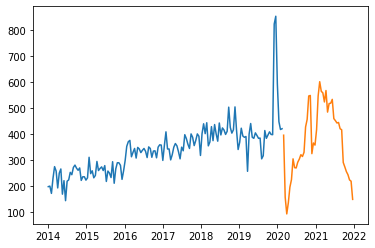

In [ ]:
plt.plot(train, label='Training')
plt.plot(test, label='Test')

In [ ]:
test.shape

(45,)

In [ ]:
arima_model = auto_arima(train,start_p=0, d=1, start_q=0,max_p=5, max_d=4, max_q=5,D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=26, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50, scoring='mse')

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,0)[26]             : AIC=1402.521, Time=0.49 sec
 ARIMA(0,1,0)(0,1,0)[26]             : AIC=1406.398, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[26]             : AIC=1401.380, Time=0.64 sec
 ARIMA(0,1,1)(0,1,1)[26]             : AIC=1394.416, Time=1.28 sec
 ARIMA(0,1,1)(0,1,0)[26]             : AIC=1397.119, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[26]             : AIC=1396.225, Time=2.60 sec
 ARIMA(0,1,1)(0,1,2)[26]             : AIC=1396.145, Time=6.79 sec
 ARIMA(0,1,1)(1,1,0)[26]             : AIC=1395.448, Time=1.14 sec
 ARIMA(0,1,1)(1,1,2)[26]             : AIC=inf, Time=4.74 sec
 ARIMA(0,1,0)(0,1,1)[26]             : AIC=1400.070, Time=2.13 sec
 ARIMA(1,1,1)(0,1,1)[26]             : AIC=inf, Time=2.82 sec
 ARIMA(0,1,2)(0,1,1)[26]             : AIC=inf, Time=3.59 sec
 ARIMA(1,1,0)(0,1,1)[26]             : AIC=1399.475, Time=2.73 sec
 ARIMA(1,1,2)(0,1,1)[26]             : AIC=inf, Time=3.02 sec
 ARIMA(0,1,1)(0,1,1)[26] intercept   : 

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  150
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 26)   Log Likelihood                -694.208
Date:                            Wed, 02 Mar 2022   AIC                           1394.416
Time:                                    16:49:32   BIC                           1402.852
Sample:                                         0   HQIC                          1397.843
                                            - 150                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4961      0.048    -10.292      0.000      -0.591      -0.402
ma.S.L26      -0.3140      0.149     -2.100      0.036      -0.607      -0.021
sigma2      4564.8880    222.509     20.516      0.000    4128.778    5000.998
===================================================================================
Ljung-Box (L1) (Q):                   3.97   Jarque-Bera (JB):               865.36
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               6.67   Skew:                             2.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods =45), index=test.index)
prediction.columns = ['Predicción']
prediction
prediction['Real'] = test

In [ ]:
from sklearn.metrics import *

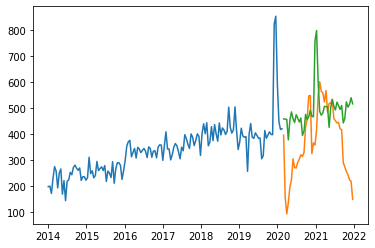

In [ ]:
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(prediction['Predicción'])

In [ ]:
r2 = r2_score(prediction['Real'],prediction['Predicción'])
mse = mean_squared_error(prediction['Real'],prediction['Predicción'])
mae = mean_absolute_error(prediction['Real'],prediction['Predicción'])
print('R2:', r2)
print('MSE:', mse)
print('MAE:', mae)

R2: -0.8741495761681028
MSE: 34264.23541616056
MAE: 147.73394760179008


### Mes

In [ ]:
df_time_mes = df_time.resample('M').sum()

In [ ]:
adf_test = ADFTest(alpha= 0.05)
adf_test.should_diff(df_time_mes)

(0.08969613301148434, True)

In [ ]:
df_time_mes.shape

(96,)

In [ ]:
train = df_time_mes.iloc[:85]
test = df_time_mes.iloc[86:]

In [ ]:
test.shape

(10,)

In [ ]:
arima_model = auto_arima(train,start_p=0, d=1, start_q=0,max_p=5, max_d=4, max_q=5,D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True, random_state=20, n_fits=100, scoring='mse')

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=977.187, Time=0.11 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1010.465, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=970.660, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=966.093, Time=0.56 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=982.503, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=964.843, Time=0.73 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=965.434, Time=0.25 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=964.916, Time=1.98 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=965.306, Time=1.55 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=963.717, Time=1.11 sec
 ARIMA(0,1,1)(0,1,3)[12]             : AIC=965.187, Time=3.17 sec
 ARIMA(0,1,1)(1,1,3)[12]             : AIC=inf, Time=5.73 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=970.369, Time=1.36 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=957.888, Time=2.07 sec
 ARIMA(1,1,1)(0,1,1)[12]            

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   85
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -473.944
Date:                                 Wed, 02 Mar 2022   AIC                            957.888
Time:                                         16:54:20   BIC                            969.271
Sample:                                              0   HQIC                           962.419
                                                  - 85                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4101      0.122      3.365      0.001       0.171       0.649
ma.L1         -0.9078      0.086    -10.562      0.000      -1.076      -0.739
ma.S.L12      -0.9080      0.128     -7.085      0.000      -1.159      -0.657
ma.S.L24       0.4855      0.306      1.584      0.113      -0.115       1.086
sigma2      2.565e+04   4081.463      6.284      0.000    1.76e+04    3.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               623.78
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):              14.10   Skew:                             1.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods =10), index=test.index)
prediction.columns = ['Predicción']
prediction['Real'] = test

In [ ]:
r2 = r2_score(prediction['Real'],prediction['Predicción'])
mse = mean_squared_error(prediction['Real'],prediction['Predicción'])
mae = mean_absolute_error(prediction['Real'],prediction['Predicción'])
print('R2:', r2)
print('MSE:', mse)
print('MAE:', mae)

R2: -0.3814741967786708
MSE: 87997.36442227925
MAE: 262.04191756775106


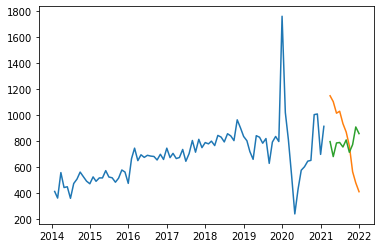

In [ ]:
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(prediction['Predicción'])

### Anual

In [ ]:
df_time_anio = df_time.resample('Y').sum()

In [ ]:
adf_test = ADFTest(alpha= 0.05)
adf_test.should_diff(df_time_anio)

(0.9624714941350442, True)

In [ ]:
df_time_anio.shape

(8,)

In [ ]:
train = df_time_anio.iloc[:6]
test = df_time_anio.iloc[6:]

In [ ]:
test.shape

(2,)

In [ ]:
arima_model = auto_arima(train,start_p=0, d=1, start_q=0,max_p=5, max_d=4, max_q=5,D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=1, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True, random_state=20, n_fits=100, scoring='mse')

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=82.754, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=80.917, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=193.445, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=86.472, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=109.307, Time=0.81 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=86.978, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.678 seconds


In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    6
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -37.459
Date:                Wed, 02 Mar 2022   AIC                             80.917
Time:                        16:55:24   BIC                             79.746
Sample:                             0   HQIC                            77.773
                                  - 6                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1743.4606    691.134      2.523      0.012     388.863    3098.058
ar.L1         -0.6559      0.631     -1.040      0.298      -1.892       0.581
sigma2       1.45e+05   1.92e+05      0.756      0.450   -2.31e+05    5.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.57   Prob(JB):                         0.94
Heteroskedasticity (H):               0.83   Skew:                             0.07
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods =2), index=test.index)
prediction.columns = ['Predicción']
prediction['Real'] = test

In [ ]:
prediction

,Predicción,Real
FECHA,,
2020-12-31,11850.541300,8221
2021-12-31,12560.549572,10350


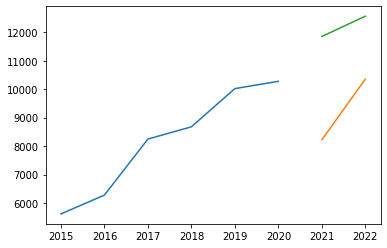

In [ ]:
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(prediction['Predicción'])